In [44]:
%matplotlib inline
import cv2
import seaborn as sns
import pandas as pd
import plotly.express as px
import nncomp
from nncomp_molecule import constants

In [2]:
PREPROCESSED_DIR = constants.INPUTDIR / "kfujikawa" / "bms-preprocess-v2"
MODEL_DIR = constants.OUTPUTDIR / "1009_tnt_bert"

In [3]:
train_df = pd.read_pickle(PREPROCESSED_DIR / "train.pkl").drop(columns="InChI")
df = pd.read_csv(MODEL_DIR / "fold=0/valid_beam=1.csv")
df = df.merge(train_df)
df

,image_id,InChI,InChI_GT,loss,levenshtein,...,InChI_length,w,h,w/h,w*h
0,de3b3656a516,"InChI=1S/C14H15O6P/c1-2-18-21(17,19-13-7-3-5-1...","InChI=1S/C14H15O6P/c1-2-18-21(17,19-13-7-3-5-1...",1.293541e-04,0,...,100,460,223,2.062780,102580
1,0efd9aacd662,InChI=1S/C23H23N3O4/c27-22-17-8-2-3-9-18(17)24...,InChI=1S/C23H23N3O4/c27-22-17-8-2-3-9-18(17)24...,7.776922e-05,0,...,160,266,234,1.136752,62244
2,362bc10c4e4d,"InChI=1S/C14H20O3/c1-13(2,3)14(10-17-14)9-16-1...","InChI=1S/C14H20O3/c1-13(2,3)14(10-17-14)9-16-1...",7.795867e-07,0,...,85,367,201,1.825871,73767
3,8f96a04e11e3,"InChI=1S/C7H13N3O4S/c1-2-6(5-8)15(12,13)10-3-4...","InChI=1S/C7H13N3O4S/c1-2-6(5-8)15(12,13)10-3-4...",1.737903e-04,0,...,83,236,149,1.583893,35164
4,cc5d9199227a,InChI=1S/C20H18N4OS/c1-13-11-14(2)23-20-16(13)...,InChI=1S/C20H18N4OS/c1-13-11-14(2)23-20-16(13)...,4.680708e-06,0,...,129,414,320,1.293750,132480
...,...,...,...,...,...,...,...,...,...,...,...
242414,8b6d97f8f0db,InChI=1S/C11H17BrO/c1-7-6-10(12)11(13)9-5-3-2-...,InChI=1S/C11H17BrO/c1-7-6-10(12)11(13)9-5-3-2-...,3.568481e-02,2,...,102,261,236,1.105932,61596
242415,d17b0152f7e7,InChI=1S/C18H18N2O4/c1-23-13-7-8-15(16(9-13)24...,InChI=1S/C18H18N2O4/c1-23-13-7-8-15(16(9-13)24...,8.325020e-05,0,...,122,284,164,1.731707,46576
242416,10313b7b8dce,InChI=1S/C16H23F3N2/c1-20-9-6-13-7-10-21(11-8-...,InChI=1S/C16H23F3N2/c1-20-9-6-13-7-10-21(11-8-...,4.728177e-05,0,...,103,501,208,2.408654,104208
242417,e8d59fcc92bf,InChI=1S/C19H28N2O2/c1-18-8-7-14-12(13(18)5-6-...,InChI=1S/C19H28N2O2/c1-18-8-7-14-12(13(18)5-6-...,2.908324e-02,0,...,157,426,233,1.828326,99258


1.9018187518305083


<AxesSubplot:>

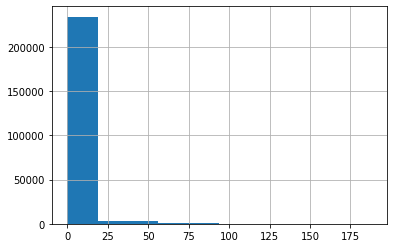

In [4]:
%matplotlib inline
print(df.levenshtein.mean())
df.levenshtein.hist()

In [5]:
df.levenshtein.value_counts().sort_index()

0      204681
1       16085
2        4901
3        1729
4        1189
        ...  
174         1
181         1
182         1
184         1
188         1
Name: levenshtein, Length: 151, dtype: int64

<AxesSubplot:xlabel='InChI_length', ylabel='levenshtein'>

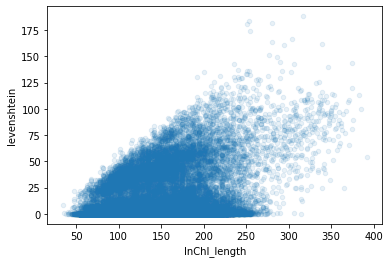

In [9]:
df.plot.scatter("InChI_length", "levenshtein", alpha=.1)

<AxesSubplot:xlabel='w', ylabel='levenshtein'>

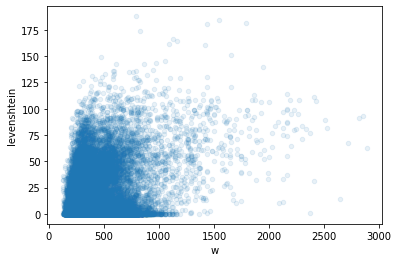

In [10]:
df.plot.scatter("w", "levenshtein", alpha=.1)

<AxesSubplot:xlabel='w/h', ylabel='levenshtein'>

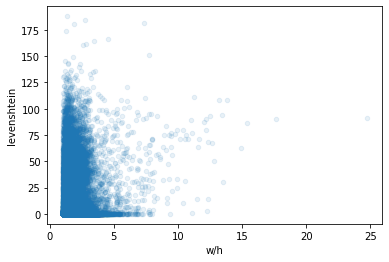

In [12]:
df.plot.scatter("w/h", "levenshtein", alpha=.1)

<AxesSubplot:xlabel='w*h', ylabel='levenshtein'>

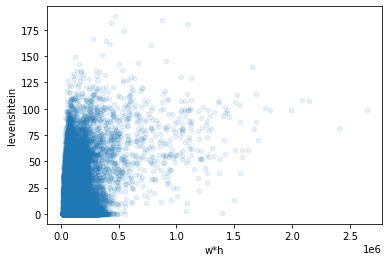

In [13]:
df.plot.scatter("w*h", "levenshtein", alpha=.1)

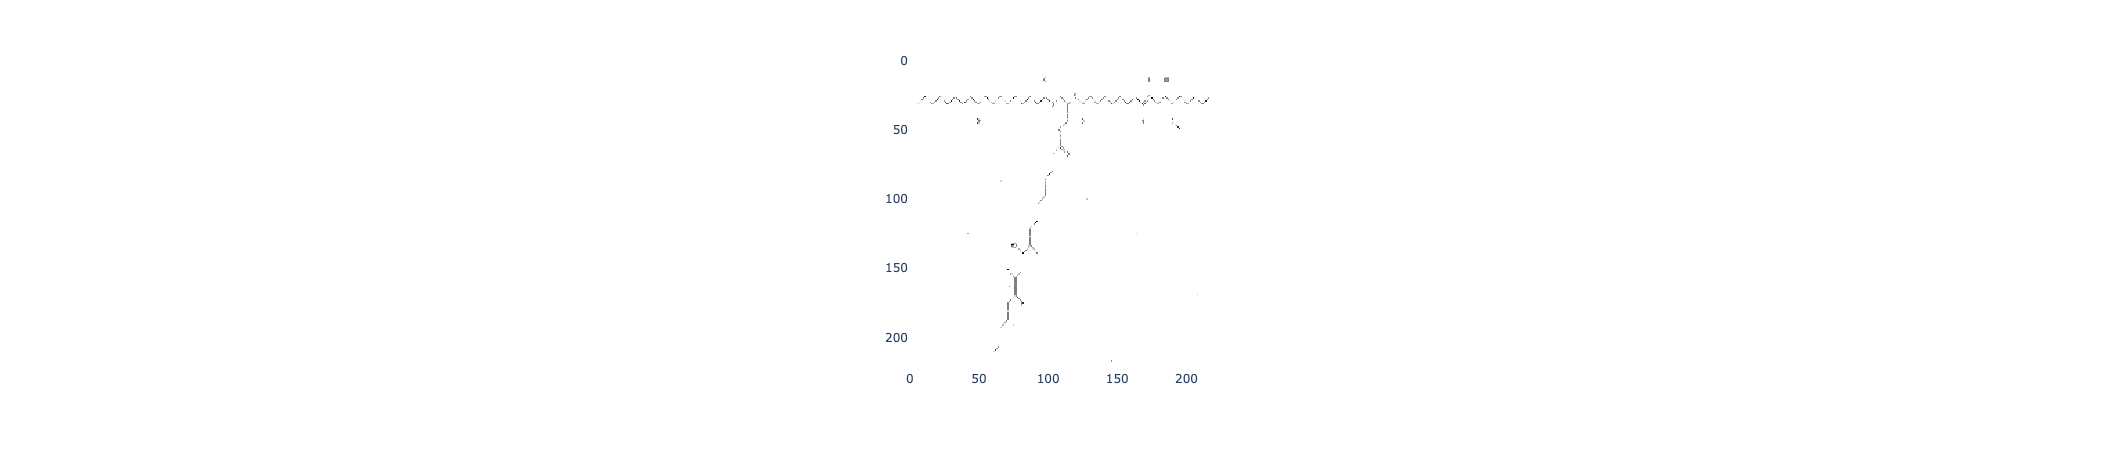

In [21]:
image_id = "5e0c7d9e41d5"
datadir = constants.COMPETITION_DATADIR / "train"
image_path = datadir / "/".join(image_id[:3]) / f"{image_id}.png"
px.imshow(cv2.imread(str(image_path)))
px.imshow(cv2.resize(cv2.imread(str(image_path)), (224, 224)))

In [22]:
df.sort_values("InChI_length")

,image_id,InChI,InChI_GT,loss,levenshtein,...,InChI_length,w,h,w/h,w*h
117540,ff46160b9517,"InChI=1S/CH2,2N/c1-2-3/h2H3/i1D3,2D3","InChI=1S/CH4N/c1-2/h2H,1H3/i1D3,2D",0.924077,9,...,34,196,156,1.256410,30576
120916,cbaa4844a4a4,"InChI=1S/CHF7NS/c2-1(3)9-10(4,5,6,7)8","InChI=1S/CF7NS/c2-1(3)9-10(4,5,6,7)8",0.279330,1,...,36,227,174,1.304598,39498
212861,05fe5fc5e7b4,"InChI=1S/C2Cl6NP/c3-1(4)2(5)9-10(6,7)8","InChI=1S/C2Cl6NP/c3-1(4)2(5)9-10(6,7)8",0.020116,0,...,38,168,122,1.377049,20496
152755,ba5f90c83ee7,"InChI=1S/C3HClF4O/c4-2(9)1(5)3(6,7)8/h1H","InChI=1S/C3HClF4O/c4-2(9)1(5)3(6,7)8/h1H",0.000332,0,...,40,229,194,1.180412,44426
118746,3df4c0ffda0b,"InChI=1S/C2F3NO3S/c3-2(4,5)1(7)6-8-10(6)9","InChI=1S/C2F3NO3S/c3-2(4,5)1(7)6-9-10(6)8",0.236574,2,...,41,269,194,1.386598,52186
...,...,...,...,...,...,...,...,...,...,...,...
180448,807b043f3c86,InChI=1S/C57H90O6/c1-4-7-10-13-16-19-22-25-27-...,InChI=1S/C56H88O6/c1-4-7-10-13-16-19-22-25-27-...,0.082222,120,...,375,788,318,2.477987,250584
135736,b440ab35d6a0,InChI=1S/C57H94O6/c1-4-7-10-13-16-19-22-25-27-...,InChI=1S/C56H90O6/c1-4-7-10-13-16-19-22-25-26-...,0.109687,89,...,376,906,752,1.204787,681312
222210,75c32fbd3779,InChI=1S/C69H131NO5/c1-3-5-7-9-11-13-15-17-18-...,InChI=1S/C69H127NO5/c1-3-5-7-9-11-13-15-17-18-...,0.069001,113,...,383,927,643,1.441680,596061
165563,01d9b7ce6ba1,InChI=1S/C63H106O6/c1-4-7-10-13-16-19-22-25-28...,InChI=1S/C62H106O6/c1-4-7-10-13-16-19-22-25-27...,0.099195,100,...,385,802,488,1.643443,391376


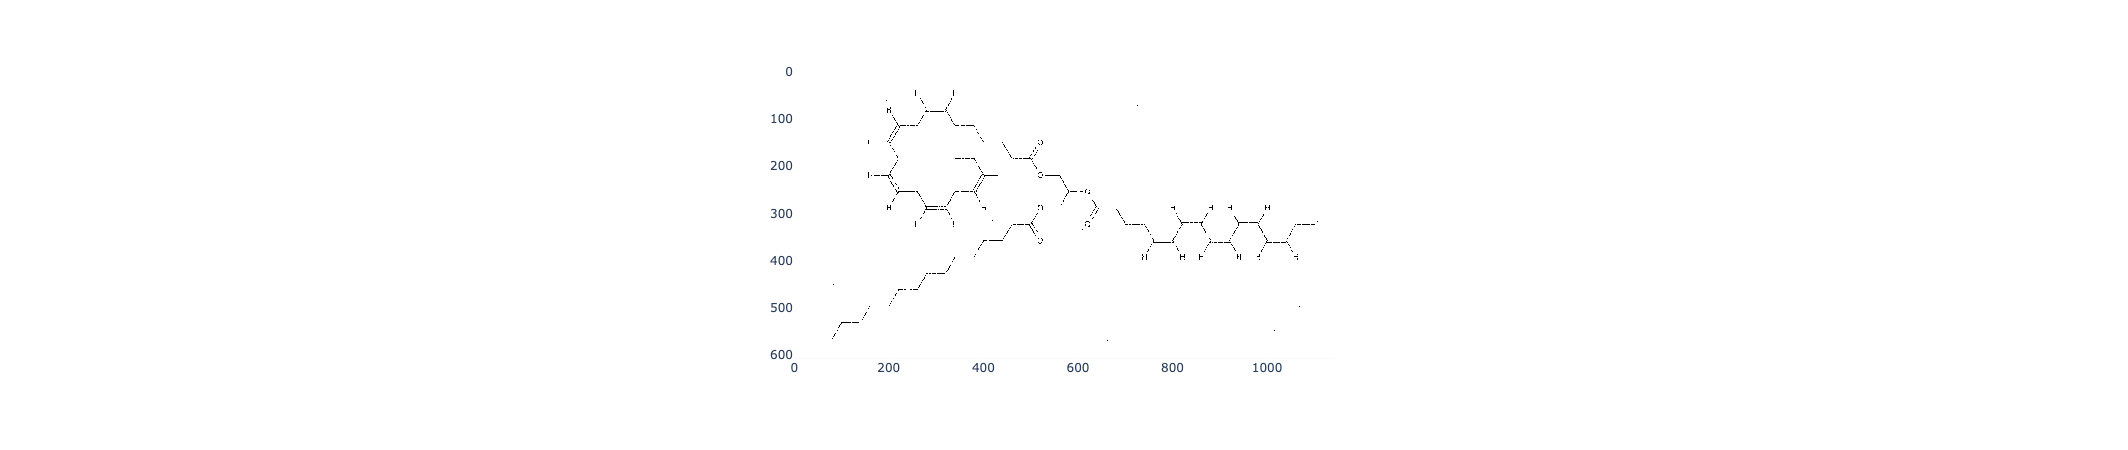

In [33]:
image_id = "a3c096ab64e7"
datadir = constants.COMPETITION_DATADIR / "train"
image_path = datadir / "/".join(image_id[:3]) / f"{image_id}.png"
image = cv2.imread(str(image_path))
px.imshow(image)
# px.imshow(cv2.resize(cv2.imread(str(image_path)), (224, 224)))